Для начала нужно подключить библиотеки для работы с изображением

In [1]:
from PIL import Image
import random
import os

Далее создаем переменные rand_folder и folder. Так как у нас 7 папок, то и диапозон будет соответсвующий. Мы создаем список images по указаному пути, где находяться изображения

In [2]:
rand_folder = random.randint(1, 7)
folder = f'../data/DATASET/train/{rand_folder}'
images = [f for f in os.listdir(folder)
          if f.lower().endswith(('.jpg'))]

Далее нам нужно выбрать изображение случайным образом и написать полный путь к изображению

In [3]:
random_image = random.choice(images)
image_path = os.path.join(folder, random_image)

После создаем переменную photo и photo_data. В photo открываем само изображение, а в photo_data предмтавляем цвета в численное представление. В данном случае это будет список каждого пикселя в формате RGB.

In [4]:
photo = Image.open(image_path)
photo_data = list(photo.getdata())
print(image_path)
print(photo.size)
print(photo.mode)
print(photo_data)

../data/DATASET/train/2/train_09310_aligned.jpg
(100, 100)
RGB
[(17, 17, 17), (25, 25, 25), (37, 37, 37), (46, 46, 46), (47, 47, 47), (50, 50, 50), (63, 63, 63), (77, 77, 77), (67, 67, 67), (68, 68, 68), (66, 66, 66), (79, 79, 79), (109, 109, 109), (128, 128, 128), (134, 134, 134), (141, 141, 141), (144, 144, 144), (143, 143, 143), (135, 135, 135), (138, 138, 138), (155, 155, 155), (158, 158, 158), (149, 149, 149), (147, 147, 147), (154, 154, 154), (155, 155, 155), (154, 154, 154), (150, 150, 150), (144, 144, 144), (142, 142, 142), (143, 143, 143), (145, 145, 145), (136, 136, 136), (134, 134, 134), (132, 132, 132), (132, 132, 132), (134, 134, 134), (133, 133, 133), (131, 131, 131), (129, 129, 129), (135, 135, 135), (132, 132, 132), (123, 123, 123), (113, 113, 113), (110, 110, 110), (112, 112, 112), (113, 113, 113), (110, 110, 110), (114, 114, 114), (112, 112, 112), (111, 111, 111), (111, 111, 111), (113, 113, 113), (114, 114, 114), (114, 114, 114), (113, 113, 113), (98, 98, 98), (99, 9

Ответы на вопросы по первому этапу:
1. Режим изображений RGB, размер изображений 100х100. Все изображения в датасете имеют одинаковый размер
2. Изображение численно представленно в виде списка, состоящего из 10000 элементов(т.к. размер изображения 100х100). Каналы - это отдельные компоненты цвета, из котрых сосотоит полное изображения. В исходном изображение 3 канала типа RGB.
3. Пиксели имееют тип данных кортеж. В кортежележит три числа, они принимают значения от 0 до 255, например: (167, 144, 113)

Этап 2:
Нужно подключить библиотку torchvision.transforms

In [5]:
import torch
import torchvision.transforms as t

Далее мы создаем переменную pipline, где используем Grayscale, Resize,ToTensor и Normalize

In [6]:
pipline = t.Compose([
    t.Grayscale(num_output_channels=1),
    t.Resize((100, 100)),
    t.ToTensor(),
    t.Normalize(mean=[0.5], std=[0.5])
])

После создаем переменную transofrm_image, где в наш конфеер кладём не трансформированное фото

In [7]:
transform_image = pipline(photo)
print(transform_image)

tensor([[[-0.8667, -0.8039, -0.7098,  ..., -0.9686, -0.9686, -0.9686],
         [-0.7725, -0.7961, -0.7490,  ..., -0.9686, -0.9686, -0.9686],
         [-0.7490, -0.7647, -0.7098,  ..., -0.9686, -0.9686, -0.9686],
         ...,
         [-0.8510, -0.8667, -0.8588,  ..., -0.9059, -0.9137, -0.9216],
         [-0.8353, -0.8431, -0.8275,  ..., -0.9059, -0.9137, -0.9216],
         [-0.7882, -0.8039, -0.7882,  ..., -0.9137, -0.9137, -0.9216]]])


Ответы на вопросы:
1. Будет полезно избавиться от цветов, т.к. нам нужна геометрия лица, модель будет сфокусирована именно на объекте. Численное пердстваление изменилось, теперь у нас только 1 канал.
2. Нужно в батче иметь одинаковый размер, т.к. модель даст лучшие результаты, если все фотографии будут 1 размера
3. Трансформация преобразует все в тензор типа float32. c диапазоном данных [0, 1]. а также получили массив
4. Нормализация нужна для ускорения обучения, помощи к градиентному спуску, а также для повышения тончости. ДЛя черно-белого изображения стоит писать в mean и std [0.5]

Этап 3: Для начала подключим pandas, matplotlib.pyplot, toPILImage

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

При помощи pandas откроем csv таблицу train_labels

In [9]:
data = pd.read_csv('../data/train_labels.csv')

По скольку у нас 7 эмоций, то считать количевство изображений будем через значение labe = номер_папки, где номер_папки обазначает папку, где храняться изображения некоторых эмоций. Посчитаем количевство всех 7 папок

In [ ]:
result_wonder = (data['label'] == 1).sum()
result_scared = (data['label'] == 2).sum()
result_disgust = (data['label'] == 3).sum()
result_happy = (data['label'] == 4).sum()
result_sad = (data['label'] == 5).sum()
result_angry = (data['label'] == 6).sum()
result_neutral = (data['label'] == 7).sum()

Для визуализаций количевста изображенйи для каждой эмоции нужно построить график при помощи matplotlib. Где за x возбмем список эмоций, а за y возьмем посчитаное количевство. После построим столбчатую диаграмму

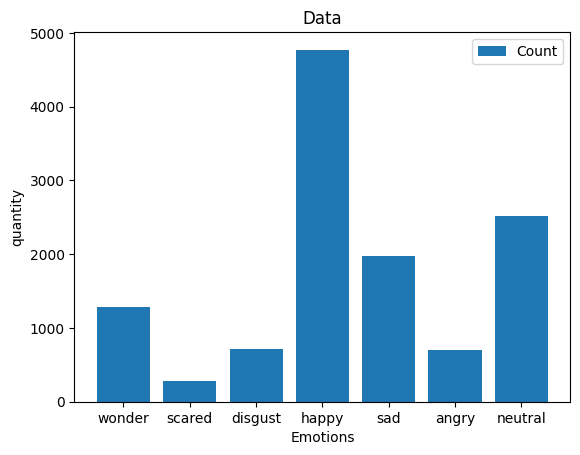

In [ ]:
x = ['wonder', 'scared', 'disgust', 'happy', 'sad', 'angry', 'neutral']
y = [result_wonder, result_scared, result_disgust, result_happy, result_sad, result_angry, result_neutral]

plt.bar(x, y, label = 'Count')
plt.xlabel('Emotions')
plt.ylabel('quantity')
plt.title('Data')
plt.legend()
plt.show()

Далее напишем функцию визуализации, где мы сравним оригинальное изображение, чёрно-белое изображение, а также финальный тензор после всех преобразований. У функции будут 2 аргумента, это путь оригинального изображения и тензор. Функция будет сразу делать график

In [ ]:
def visualize(image_path, tensor_image):
    image = Image.open(image_path)
    gray_image = image.convert('L')
    to_pil = ToPILImage()
    final_image = to_pil(tensor_image)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image)
    axes[0].set_title("Оригинал")
    axes[0].axis("off")

    axes[1].imshow(gray_image, cmap="gray")
    axes[1].set_title("Grayscale")
    axes[1].axis("off")

    axes[2].imshow(final_image)
    axes[2].set_title("После преобразований")
    axes[2].axis("off")

    plt.show()

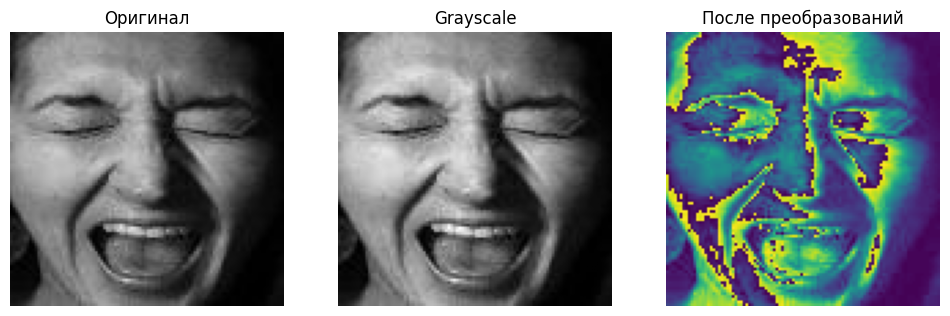

In [ ]:
visualize(image_path, transform_image)

Ответы на вопросы:
1. Датасет не являетться сбалансированым. Глядя на гистограмму, больше всего представленны эмоции счастья(около 5 тыс.), меньше всего эмоций страза(около 300). Модель будет лучше понимать счастье, чем страх. Возможно будут ошибочные предсказания.
2. После всех преобразований на чертах лица появился кислотно-желтый цвет. Цвет появился на губах, глаз, на носу. Само лицо этим цветом обвелось. Черты остаються.